# Task-02

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.


In [1]:
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


In [2]:
year=[]
Title=[]
Min=[]
Genre=[]
Votes=[]
Rating=[]
Director=[]
Gross_earning=[]
Metascore=[]

first="https://www.imdb.com/search/title/?title_type=feature&sort=num_votes,desc&ref_=adv_prv"

pages = np.arange(1, 1000,50)
pages
for page in pages:
    # Getting the contents from the each url
    url='https://www.imdb.com/search/title/?title_type=feature&sort=num_votes,desc&start='+str(page)+'&ref_=adv_nxt'
    print(url)
    
    #requesting website to get the html
    i=requests.get(url)
    
    #Converting html to text
    soup=BeautifulSoup(i.text)
    
    #The data of Year
    #year=[]
    y=(soup.find_all("span",class_="lister-item-year text-muted unbold"))
    for i in y:
        year.append(i.text.split()[0])
        for i in range(len(year)):
            year[i]=year[i].replace("(","").replace(")","")
            year
    #The data of title
    #Title=[]
    t=soup.find_all('h3',class_="lister-item-header")
    for i in t:
        Title.append(i.text.split("\n")[2])
        Title
        
    #data extracting of movie runtime
    #Min=[]
    m=soup.find_all("span",class_="runtime")
    for i in m:
        Min.append(i.text)
        for i in range(len(Min)):
            Min[i]=Min[i].replace("min","")
            Min
    #extracting Genere
    #Genre=[]
    g=soup.find_all("span",class_="genre")
    for i in g:
        Genre.append(i.text.split()[0:][0])
        Genre
    #Votes of the movies
    #Votes=[]
    v=soup.find_all("p",class_="sort-num_votes-visible")
    for i in v:
        Votes.append(i.text.split("\n")[2])
        Votes
    #Imdb Rating Of the movies
    #Rating=[]
    r=soup.find_all("div",class_="inline-block ratings-imdb-rating")
    for i in  r:
        Rating.append(i.text.split("\n")[2])
        Rating
    #Director list of the movie
    #Director=[]
    d=soup.find_all("p", class_="")
    for i in d:
        Director.append(i.text.split("\n")[2])
        Director
    #Gross earnings of the movie
    #Gross_earning=[]
    v=soup.find_all("p",class_="sort-num_votes-visible")
    for i in v:
        Gross_earning.append(i.text.split("\n")[-2])
        for i in range(len(Gross_earning)):
            if 'M' in Gross_earning[i]:
                Gross_earning[i]= Gross_earning[i].replace('$', '').replace('M','')
                Gross_earning
    #Metascore data of the movie list
    #Metascore=[]
    m=soup.find_all("div",class_="inline-block ratings-metascore")
    for i in m:
        Metascore.append(i.text.split()[0])
        Metascore
    print("Len of Metascore",len(Metascore))
    print("Len of Genre",len(Genre))
    print("Len of Year",len(year))
    print("Len of Movie",len(Title))
    print("Len of star",len(Rating))
    print("Len of Votes",len(Votes))
    print("Len of Gross",len(Gross_earning))
    
    


https://www.imdb.com/search/title/?title_type=feature&sort=num_votes,desc&start=1&ref_=adv_nxt
Len of Metascore 50
Len of Genre 50
Len of Year 50
Len of Movie 50
Len of star 50
Len of Votes 50
Len of Gross 50
https://www.imdb.com/search/title/?title_type=feature&sort=num_votes,desc&start=51&ref_=adv_nxt
Len of Metascore 100
Len of Genre 100
Len of Year 100
Len of Movie 100
Len of star 100
Len of Votes 100
Len of Gross 100
https://www.imdb.com/search/title/?title_type=feature&sort=num_votes,desc&start=101&ref_=adv_nxt
Len of Metascore 150
Len of Genre 150
Len of Year 150
Len of Movie 150
Len of star 150
Len of Votes 150
Len of Gross 150
https://www.imdb.com/search/title/?title_type=feature&sort=num_votes,desc&start=151&ref_=adv_nxt
Len of Metascore 200
Len of Genre 200
Len of Year 200
Len of Movie 200
Len of star 200
Len of Votes 200
Len of Gross 200
https://www.imdb.com/search/title/?title_type=feature&sort=num_votes,desc&start=201&ref_=adv_nxt
Len of Metascore 249
Len of Genre 250
Len

In [3]:
# Metascore.insert(997,np.nan)
# Metascore.insert(998,np.nan)
# Metascore.insert(999,np.nan)
# Metascore.insert(1000,np.nan)

In [4]:
dta={'Year':year,'Movie':Title,'Time':Min,'Gener':Genre,'star':Rating,'Metascore':Metascore,'Votes':Votes,'Gross_earning':Gross_earning,'Director':Director}


In [5]:
hey=pd.DataFrame(dta)
hey

ValueError: All arrays must be of the same length

# Converting Dtypes

In [ ]:
hey["Votes"]=hey["Votes"].astype("int64")

In [ ]:
hey["Year"]=hey["Year"].astype("int64")

In [ ]:
hey["Year"]=hey["Year"].apply(lambda x:x.replace('2019X',"2019"))

In [ ]:
hey["Votes"]=hey["Votes"].apply(lambda x:x.replace(',',""))

In [ ]:
hey["Gross_earning"]=hey["Gross_earning"].astype("float64")

In [ ]:
hey["Gross_earning"]=hey["Gross_earning"].apply(lambda x:x.replace(',',""))

In [ ]:
hey["star"]=hey["star"].astype("float64")

In [ ]:
hey["Metascore"]=hey["Metascore"].astype("int64")

In [ ]:
hey["Time"]=hey["Time"].astype("int64")

# Filling nan Values

In [ ]:
hey=hey.fillna(56)

In [ ]:
hey

In [ ]:
hey.shape

# checking any duplicated values and dropping

In [ ]:
hey.duplicated()

In [ ]:
hey.drop_duplicates(inplace=True)

In [ ]:
hey.shape

# checking any null values

In [ ]:
hey.isnull().sum()

# Cleaning Of some Unwanted rows

In [ ]:
hey[hey['Gross_earning']>937.36]

In [ ]:
hey.drop([234,250,324,411,477,508,536,581,648,657,658,675,683,719,771,797,845,887,943,957,975,978,999],inplace=True)

In [ ]:
hey[hey['Gross_earning']>937.36]

In [ ]:
len(hey["Movie"])

In [ ]:
hey["Movie"].unique()

In [ ]:
hey["Movie"].value_counts()

# After Cleaning The Data converting to csv File

In [ ]:
hey.to_csv(r'C:\Users\k siva rao\OneDrive\DesktopIMDB_Data.csv')
df=pd.read_csv(r'C:\Users\k siva rao\OneDrive\DesktopIMDB_Data.csv')

In [4]:
df=pd.read_csv(r'C:\Users\k siva rao\OneDrive\DesktopIMDB_Data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     968 non-null    int64  
 1   Year           968 non-null    int64  
 2   Movie          968 non-null    object 
 3   Time           968 non-null    int64  
 4   Gener          968 non-null    object 
 5   star           968 non-null    float64
 6   Metascore      968 non-null    int64  
 7   Votes          968 non-null    int64  
 8   Gross_earning  968 non-null    float64
 9   Director       968 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 75.8+ KB


In [7]:
df.describe()

,Unnamed: 0,Year,Time,star,Metascore,Votes,Gross_earning
count,968.000000,968.000000,968.000000,968.000000,968.000000,9.680000e+02,968.000000
mean,485.814050,2005.085744,121.609504,7.358368,67.133264,4.726706e+05,134.077686
std,281.456194,13.135437,22.830348,0.731682,15.416178,3.181907e+05,124.768621
min,0.000000,1936.000000,76.000000,3.700000,28.000000,2.181490e+05,0.000000
25%,242.750000,2000.000000,106.000000,6.900000,56.000000,2.695138e+05,47.400000
50%,484.500000,2008.000000,119.000000,7.400000,67.000000,3.613925e+05,101.065000
75%,729.250000,2014.000000,133.000000,7.900000,79.000000,5.575550e+05,180.395000
max,973.000000,2022.000000,238.000000,9.300000,100.000000,2.719018e+06,936.660000


In [9]:
df.shape

(968, 10)

In [10]:
df

,Unnamed: 0,Year,Movie,Time,Gener,star,Metascore,Votes,Gross_earning,Director
0,0,1994,The Shawshank Redemption,142,Drama,9.3,82,2719018,28.34,Frank Darabont
1,1,2008,The Dark Knight,152,"Action,",9.0,84,2691683,534.86,Christopher Nolan
2,2,2010,Inception,148,"Action,",8.8,74,2388861,292.58,Christopher Nolan
3,3,1999,Fight Club,139,Drama,8.8,66,2162482,37.03,David Fincher
4,4,1994,Forrest Gump,142,"Drama,",8.8,82,2113847,330.25,Robert Zemeckis
...,...,...,...,...,...,...,...,...,...,...
963,969,2009,Män som hatar kvinnor,152,"Crime,",7.8,40,218907,10.10,Niels Arden Oplev
964,970,2019,Fast & Furious Presents: Hobbs & Shaw,137,"Action,",6.5,61,218652,173.96,David Leitch
965,971,1990,Misery,107,"Drama,",7.8,56,218572,61.28,Rob Reiner
966,972,2018,Tomb Raider,119,"Action,",6.3,56,218228,58.25,Roar Uthaug


In [15]:
df[["Year","Movie","Time"]]

,Year,Movie,Time
0,1994,The Shawshank Redemption,142
1,2008,The Dark Knight,152
2,2010,Inception,148
3,1999,Fight Club,139
4,1994,Forrest Gump,142
...,...,...,...
963,2009,Män som hatar kvinnor,152
964,2019,Fast & Furious Presents: Hobbs & Shaw,137
965,1990,Misery,107
966,2018,Tomb Raider,119


In [17]:
df.iterrows(1:2)

SyntaxError: invalid syntax (2215467917.py, line 1)

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df

,Year,Movie,Time,Gener,star,Metascore,Votes,Gross_earning,Director
0,1994,The Shawshank Redemption,142,Drama,9.3,82,2719018,28.34,Frank Darabont
1,2008,The Dark Knight,152,"Action,",9.0,84,2691683,534.86,Christopher Nolan
2,2010,Inception,148,"Action,",8.8,74,2388861,292.58,Christopher Nolan
3,1999,Fight Club,139,Drama,8.8,66,2162482,37.03,David Fincher
4,1994,Forrest Gump,142,"Drama,",8.8,82,2113847,330.25,Robert Zemeckis
...,...,...,...,...,...,...,...,...,...
963,2009,Män som hatar kvinnor,152,"Crime,",7.8,40,218907,10.10,Niels Arden Oplev
964,2019,Fast & Furious Presents: Hobbs & Shaw,137,"Action,",6.5,61,218652,173.96,David Leitch
965,1990,Misery,107,"Drama,",7.8,56,218572,61.28,Rob Reiner
966,2018,Tomb Raider,119,"Action,",6.3,56,218228,58.25,Roar Uthaug


In [7]:
df["Gener"]=df["Gener"].apply(lambda x:x.replace(',',""))

In [8]:
df["Director"]=df["Director"].apply(lambda x:x.replace(',',""))

In [9]:
df.rename(columns={'Gener':'Genre'}, inplace = True)

In [10]:
df[df["Gross_earning"]>800.0]

,Year,Movie,Time,Genre,star,Metascore,Votes,Gross_earning,Director
39,2019,Avengers: Endgame,181,Action,8.4,78,1160856,858.37,Anthony Russo
70,2015,Star Wars: Episode VII - The Force Awakens,138,Action,7.8,80,941175,936.66,J.J. Abrams
115,2021,Spider-Man: No Way Home,148,Action,8.2,71,780674,804.75,Jon Watts


In [11]:
#top 10 most earned movies
df1=df.sort_values(by="Gross_earning",ascending=False).head(10)
df1

,Year,Movie,Time,Genre,star,Metascore,Votes,Gross_earning,Director
70,2015,Star Wars: Episode VII - The Force Awakens,138,Action,7.8,80,941175,936.66,J.J. Abrams
39,2019,Avengers: Endgame,181,Action,8.4,78,1160856,858.37,Anthony Russo
115,2021,Spider-Man: No Way Home,148,Action,8.2,71,780674,804.75,Jon Watts
27,2009,Avatar,162,Action,7.9,83,1330930,760.51,James Cameron
246,2022,Top Gun: Maverick,130,Action,8.3,68,555252,718.73,Joseph Kosinski
109,2018,Black Panther,134,Action,7.3,88,794216,700.06,Ryan Coogler
46,2018,Avengers: Infinity War,149,Action,8.4,68,1106049,678.82,Anthony Russo
564,2022,Avatar: The Way of Water,192,Action,7.8,48,322209,659.68,James Cameron
34,1997,Titanic,194,Drama,7.9,75,1208538,659.33,James Cameron
179,2015,Jurassic World,124,Action,6.9,59,652391,652.27,Colin Trevorrow


In [15]:
#Lowest Earned movies
df2=df.sort_values(by="Gross_earning",ascending=True).head(10)
df2

,Year,Movie,Time,Genre,star,Metascore,Votes,Gross_earning,Director
863,2009,Mr. Nobody,141,Drama,7.8,88,237528,0.00,Jaco Van Dormael
841,1999,The Boondock Saints,108,Action,7.7,49,242301,0.03,Troy Duffy
831,2019,The Road,111,Drama,7.2,35,243974,0.06,John Hillcoat
651,2019,Predestination,97,Action,7.4,81,288957,0.07,Michael Spierig
814,1936,Modern Times,87,Comedy,8.5,60,246253,0.16,Charles Chaplin
508,1954,Shichinin no samurai,207,Action,8.6,59,350231,0.27,Akira Kurosawa
297,1964,Dr. Strangelove or: How I Learned to Stop Worr...,95,Comedy,8.4,77,496896,0.28,Stanley Kubrick
914,1940,The Great Dictator,125,Comedy,8.4,52,227061,0.29,Charles Chaplin
920,2019,The Lighthouse,109,Drama,7.4,61,226358,0.43,Robert Eggers
867,1997,Cube,90,Drama,7.2,54,236419,0.50,Vincenzo Natali


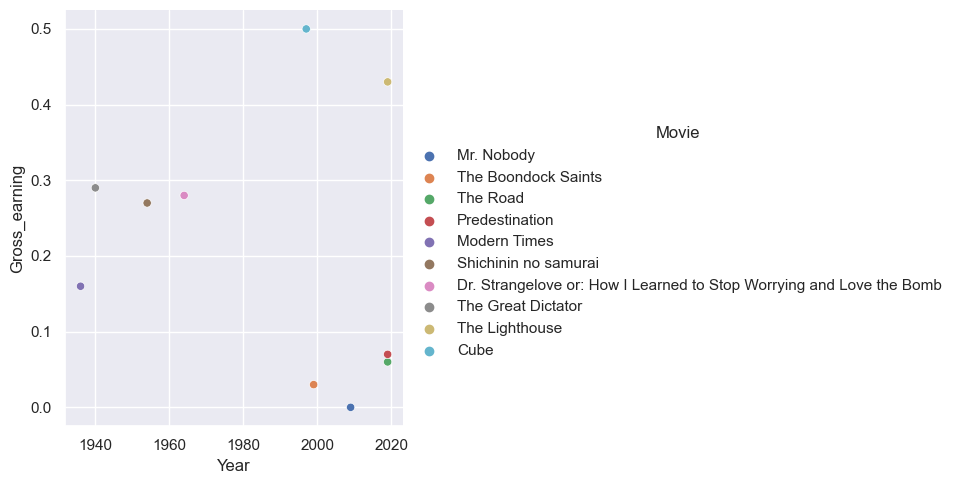

<Figure size 640x480 with 0 Axes>

In [16]:
sns.set()
ax=sns.relplot(y='Gross_earning',x='Year',data=df2,hue="Movie",kind="scatter")
plt.show()
plt.savefig("Lowest earned movies.png")



In [17]:
df["Gross_earning"].max()

936.66

In [18]:
df["Gross_earning"].min()

0.0

In [19]:
#highest Movies votes
df3=df.sort_values(by="Votes",ascending=False).head(10)
df3

,Year,Movie,Time,Genre,star,Metascore,Votes,Gross_earning,Director
0,1994,The Shawshank Redemption,142,Drama,9.3,82,2719018,28.34,Frank Darabont
1,2008,The Dark Knight,152,Action,9.0,84,2691683,534.86,Christopher Nolan
2,2010,Inception,148,Action,8.8,74,2388861,292.58,Christopher Nolan
3,1999,Fight Club,139,Drama,8.8,66,2162482,37.03,David Fincher
4,1994,Forrest Gump,142,Drama,8.8,82,2113847,330.25,Robert Zemeckis
5,1994,Pulp Fiction,154,Crime,8.9,95,2088077,107.93,Quentin Tarantino
6,1999,The Matrix,136,Action,8.7,73,1939231,171.48,Lana Wachowski
7,2001,The Lord of the Rings: The Fellowship of the Ring,178,Action,8.8,92,1900142,315.54,Peter Jackson
8,1972,The Godfather,175,Crime,9.2,100,1889271,134.97,Francis Ford Coppola
9,2014,Interstellar,169,Adventure,8.6,74,1879524,188.02,Christopher Nolan


In [20]:
df["Votes"].max()

2719018

In [ ]:
#lowest Movie Votes
df4=df.sort_values(by="Votes",ascending=True).head(10)
df4

In [ ]:
#Highest Metascore
df5=df.sort_values(by="Metascore",ascending=False).head(10)
df5


In [ ]:
#lowest Metascore
df6=df.sort_values(by="Metascore",ascending=True).head(10)
df6


In [ ]:
df[(df['Time']<120) &  (df['star']>8.5)]

In [ ]:
#best movie to suggest with best ratings and less time
df7=df[(df['Time']<137) &  (df['star']>8.5)]
df7

In [ ]:
df["Time"].mean()

In [47]:
df["Gross_earning"].mean()

134.07768595041313

In [ ]:
df

In [ ]:
#best movie to suggest with best Gross Earnings and less time
df8=df[(df['Time']>121.60950413223141) &  (df['Gross_earning']>134.07768595041313)].head(10)
df8

In [ ]:
sns.set()
ax=sns.relplot(y='Gross_earning',x='Time',data=df8,hue="Movie",kind="scatter")
plt.show()

In [22]:
df["Votes"].mean()

472670.6188016529

In [23]:
df["Gross_earning"].mean()

134.07768595041313

In [24]:
#best director on the basis of gross earning and votes 
df9=df[(df["Votes"]>472670.6188016529)   & (df['Gross_earning']>134.07768595041313)].head(10)
df9

,Year,Movie,Time,Genre,star,Metascore,Votes,Gross_earning,Director
1,2008,The Dark Knight,152,Action,9.0,84,2691683,534.86,Christopher Nolan
2,2010,Inception,148,Action,8.8,74,2388861,292.58,Christopher Nolan
4,1994,Forrest Gump,142,Drama,8.8,82,2113847,330.25,Robert Zemeckis
6,1999,The Matrix,136,Action,8.7,73,1939231,171.48,Lana Wachowski
7,2001,The Lord of the Rings: The Fellowship of the Ring,178,Action,8.8,92,1900142,315.54,Peter Jackson
8,1972,The Godfather,175,Crime,9.2,100,1889271,134.97,Francis Ford Coppola
9,2014,Interstellar,169,Adventure,8.6,74,1879524,188.02,Christopher Nolan
10,2003,The Lord of the Rings: The Return of the King,201,Action,9.0,94,1870840,377.85,Peter Jackson
11,2012,The Dark Knight Rises,164,Action,8.4,78,1726921,448.14,Christopher Nolan
12,2002,The Lord of the Rings: The Two Towers,179,Action,8.8,87,1689024,342.55,Peter Jackson


# Univariate

<AxesSubplot:ylabel='Genre'>

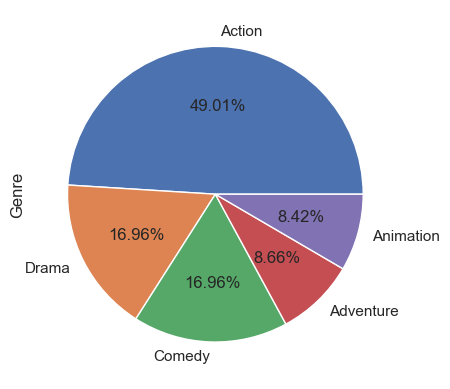

In [38]:
b= df[(df['Genre']=='Action') | (df['Genre'] == 'Drama') | (df['Genre'] == 'Comedy') | (df['Genre'] == 'Adventure') | (df['Genre'] == 'Animation')]
b['Genre'].value_counts().plot.pie(autopct = '%.2f%%')

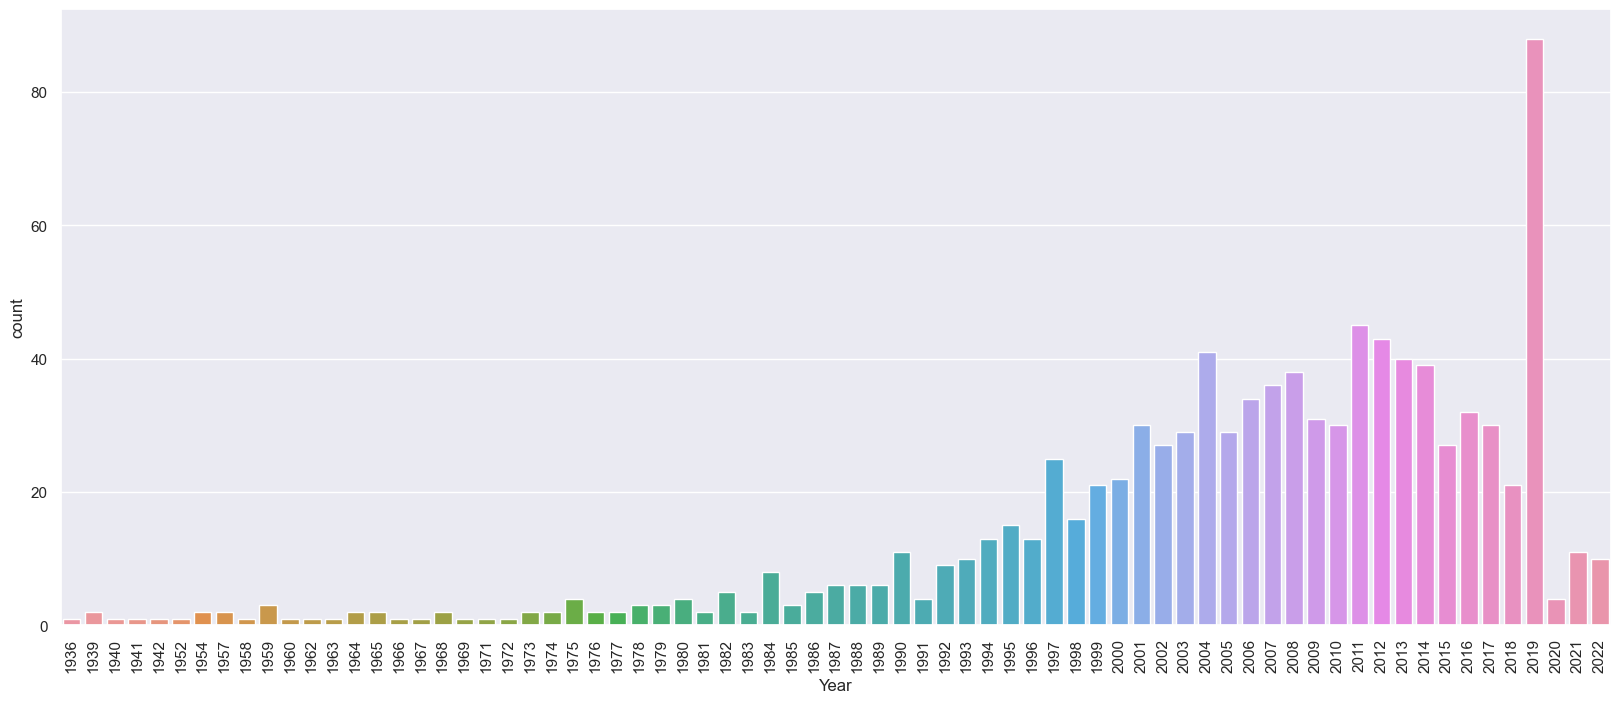

In [39]:
#Highest No. Of movies released in which year
plt.figure(figsize=(20,8))
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.show()

In [40]:
b=df["Gross_earning"]

<AxesSubplot:xlabel='Gross_earning'>

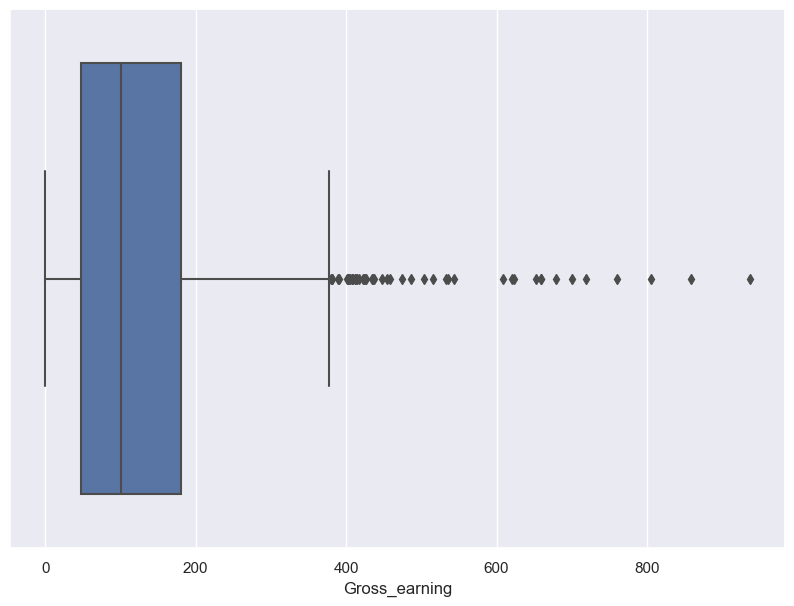

In [41]:
plt.subplots(figsize = (10,7))
sns.boxplot(b)

In [42]:
df

,Year,Movie,Time,Genre,star,Metascore,Votes,Gross_earning,Director
0,1994,The Shawshank Redemption,142,Drama,9.3,82,2719018,28.34,Frank Darabont
1,2008,The Dark Knight,152,Action,9.0,84,2691683,534.86,Christopher Nolan
2,2010,Inception,148,Action,8.8,74,2388861,292.58,Christopher Nolan
3,1999,Fight Club,139,Drama,8.8,66,2162482,37.03,David Fincher
4,1994,Forrest Gump,142,Drama,8.8,82,2113847,330.25,Robert Zemeckis
...,...,...,...,...,...,...,...,...,...
963,2009,Män som hatar kvinnor,152,Crime,7.8,40,218907,10.10,Niels Arden Oplev
964,2019,Fast & Furious Presents: Hobbs & Shaw,137,Action,6.5,61,218652,173.96,David Leitch
965,1990,Misery,107,Drama,7.8,56,218572,61.28,Rob Reiner
966,2018,Tomb Raider,119,Action,6.3,56,218228,58.25,Roar Uthaug


In [43]:
c=df["Votes"]

<AxesSubplot:xlabel='Votes', ylabel='Count'>

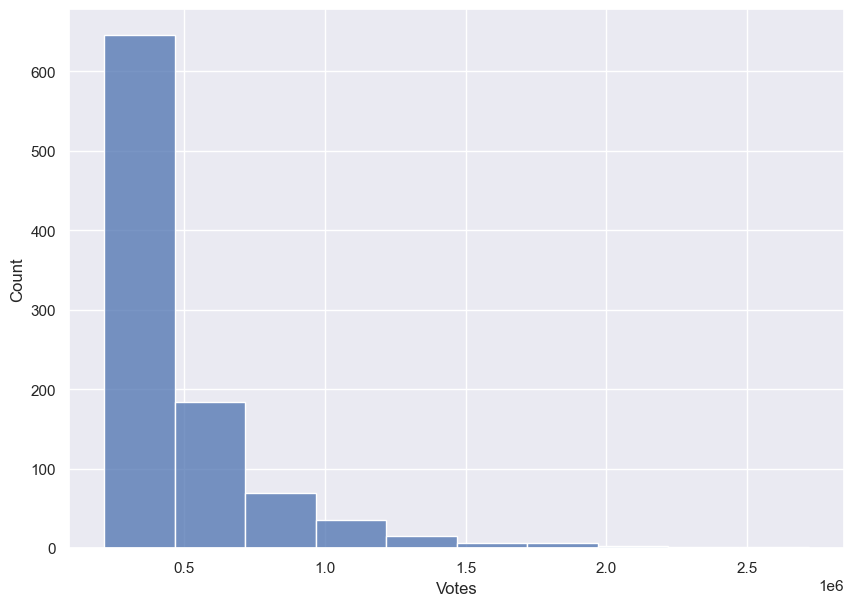

In [44]:
plt.subplots(figsize = (10,7))
sns.histplot(data=c,bins=10)

<AxesSubplot:xlabel='Metascore', ylabel='Density'>

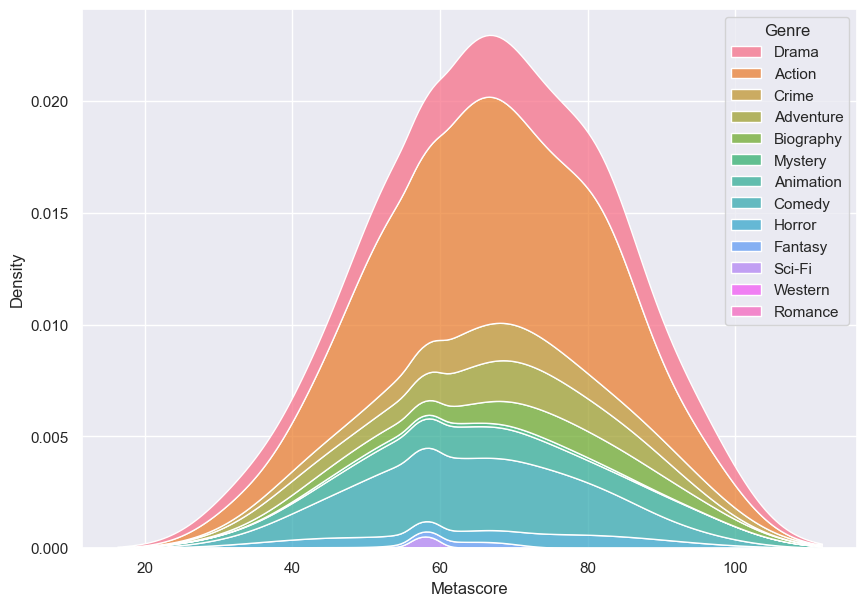

In [45]:
#relation between metsscore and Genre
ax=plt.subplots(figsize = (10,7))
sns.kdeplot(data=df, x="Metascore",hue='Genre',multiple="stack")

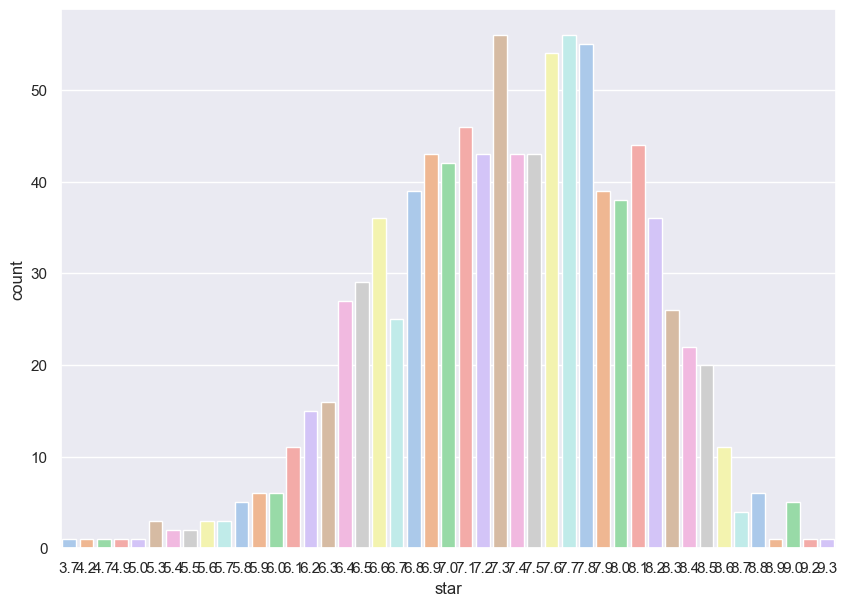

In [46]:
ax=plt.subplots(figsize = (10,7))
ax =sns.countplot(x='star',palette='pastel',data=df)

# Bivariate

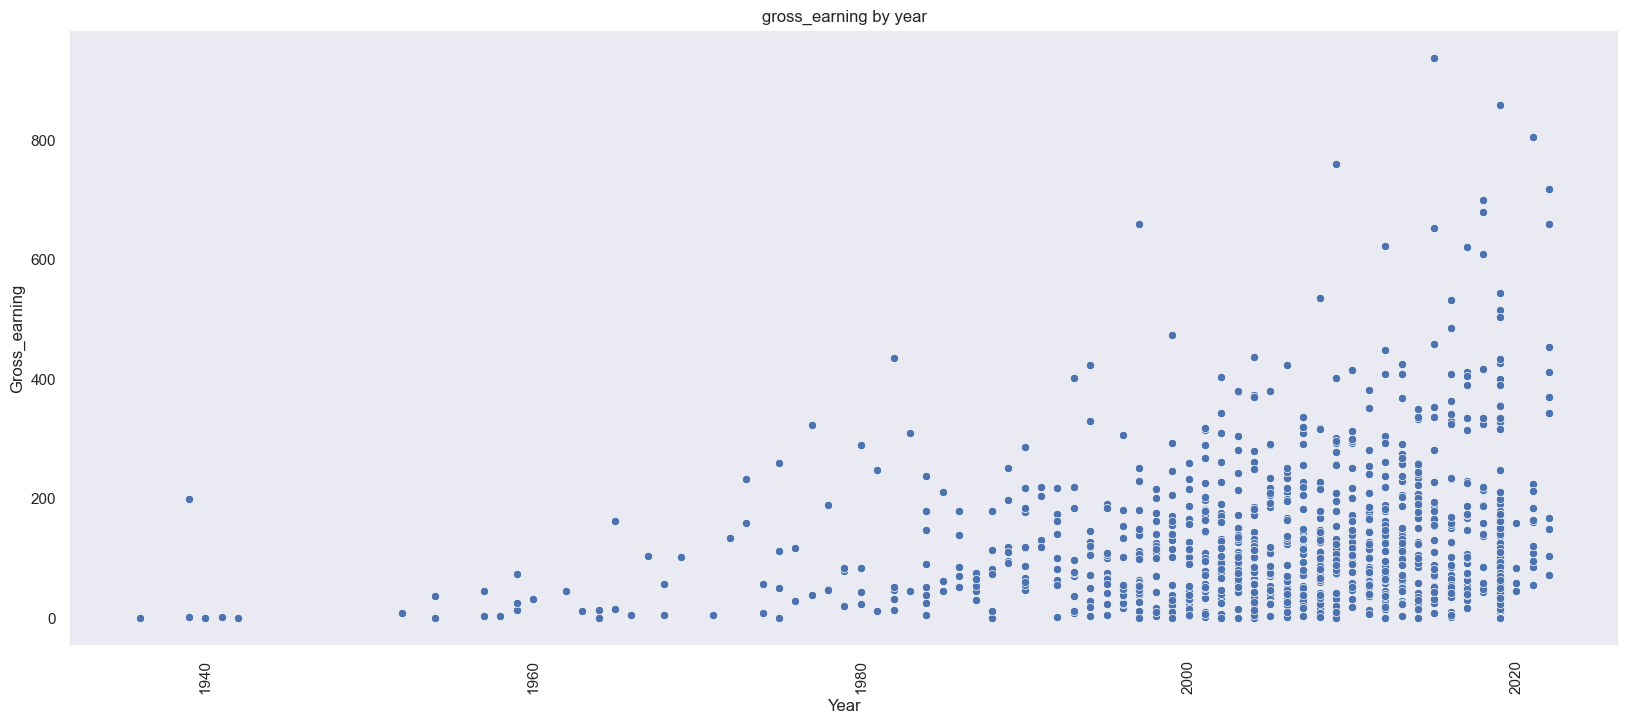

In [30]:
#Gross Earning By Year
plt.figure(figsize=(20,8))
sns.scatterplot(x='Year',y='Gross_earning',data=df)
plt.xticks(rotation=90)
plt.grid()
plt.title("gross_earning by year")
plt.show()

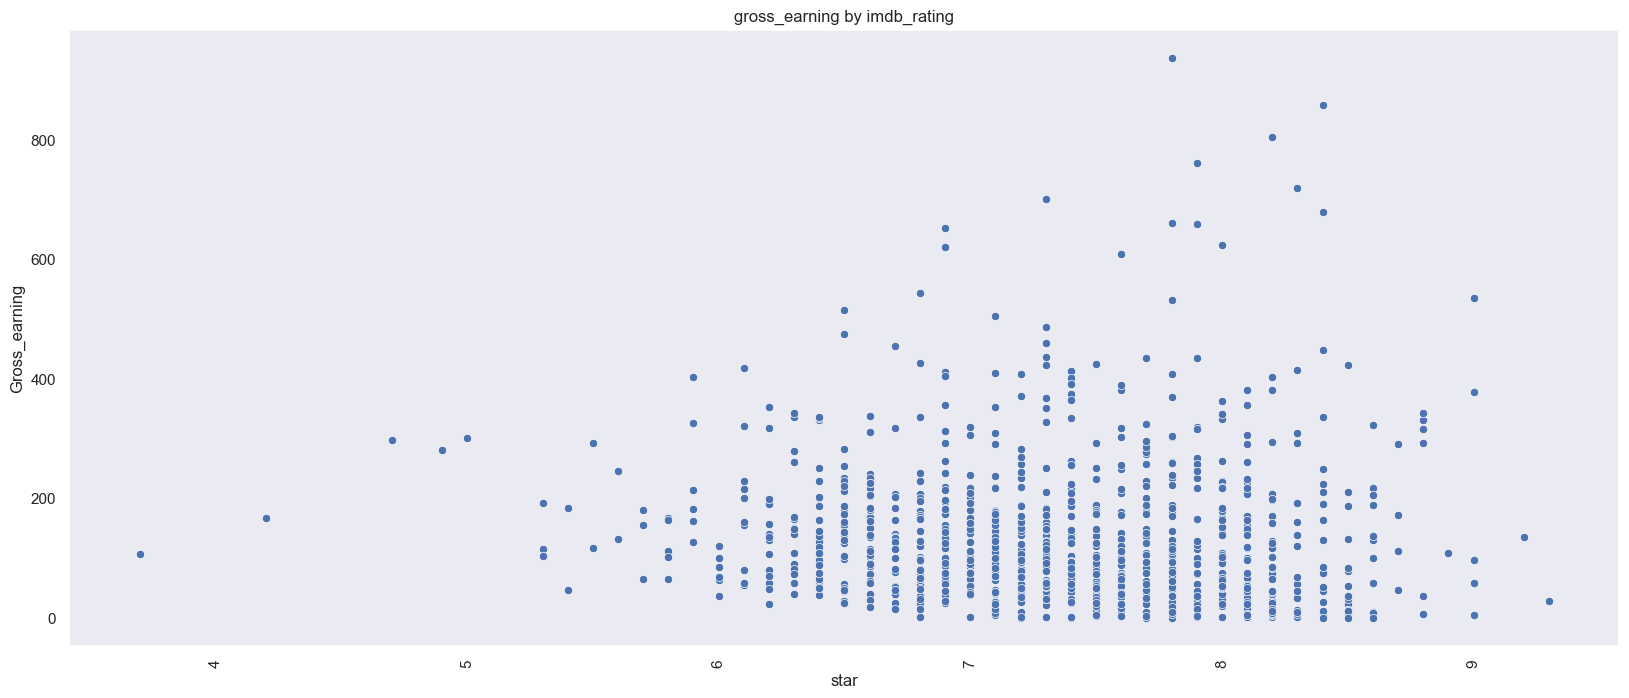

In [31]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='star',y='Gross_earning',data=df)
plt.xticks(rotation=90)
plt.grid()
plt.title("gross_earning by imdb_rating")
plt.show()

<AxesSubplot:xlabel='star', ylabel='Time'>

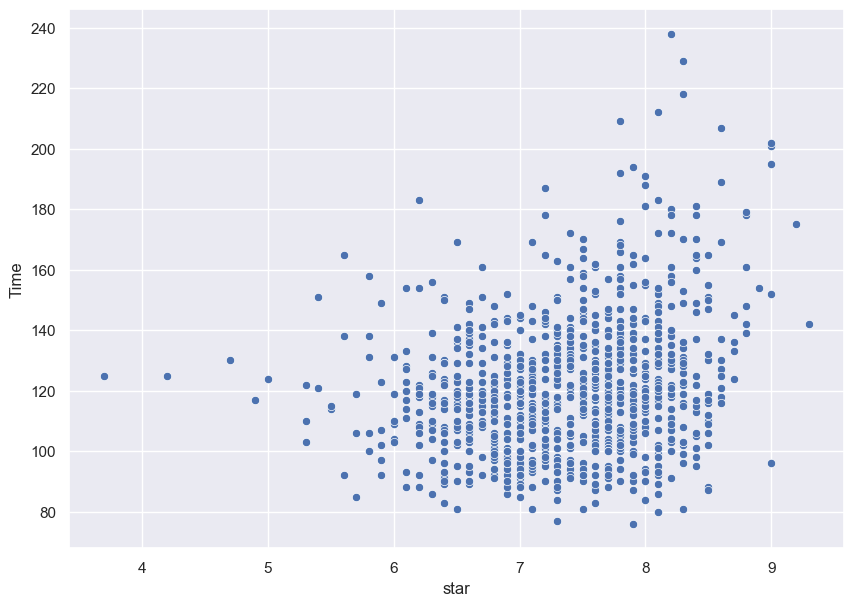

In [32]:
sns.set()
plt.subplots(figsize = (10,7))
sns.scatterplot(data=df,y="Time", x="star", hue=None, size=None, style=None, palette="Purples", hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)

<AxesSubplot:xlabel='Votes', ylabel='Genre'>

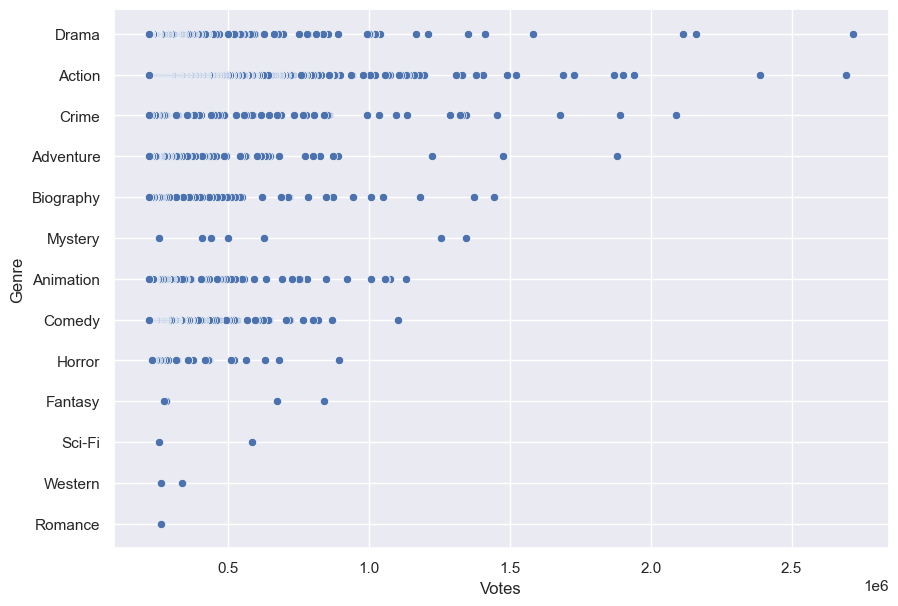

In [33]:
sns.set()
plt.subplots(figsize = (10,7))
sns.scatterplot(data=df,y="Genre", x="Votes", hue=None, size=None, style=None, palette="PiYG_r", hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)

<AxesSubplot:xlabel='Time', ylabel='Genre'>

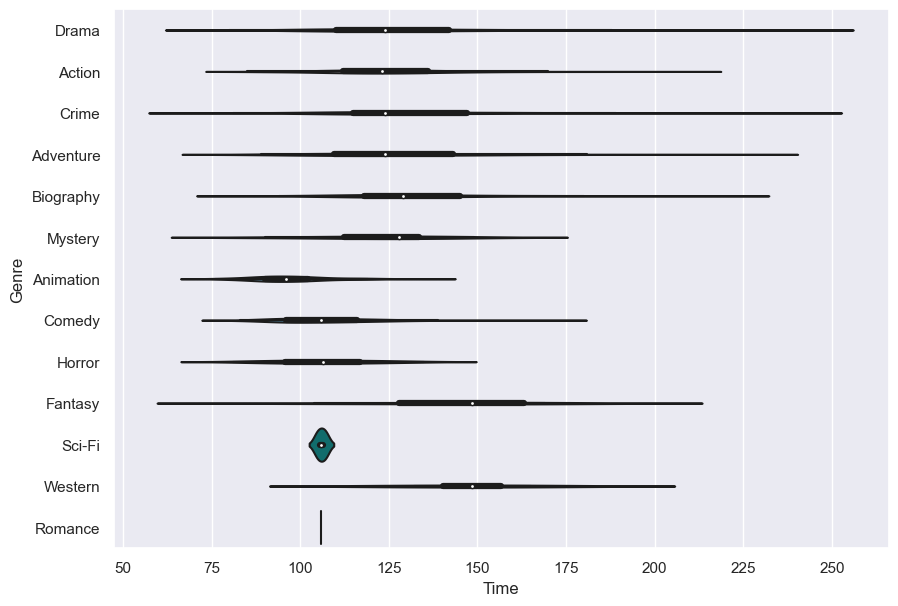

In [34]:
plt.subplots(figsize = (10,7))
sns.violinplot(data=df,x="Time", y="Genre",palette="PuBuGn")

# Multivariate

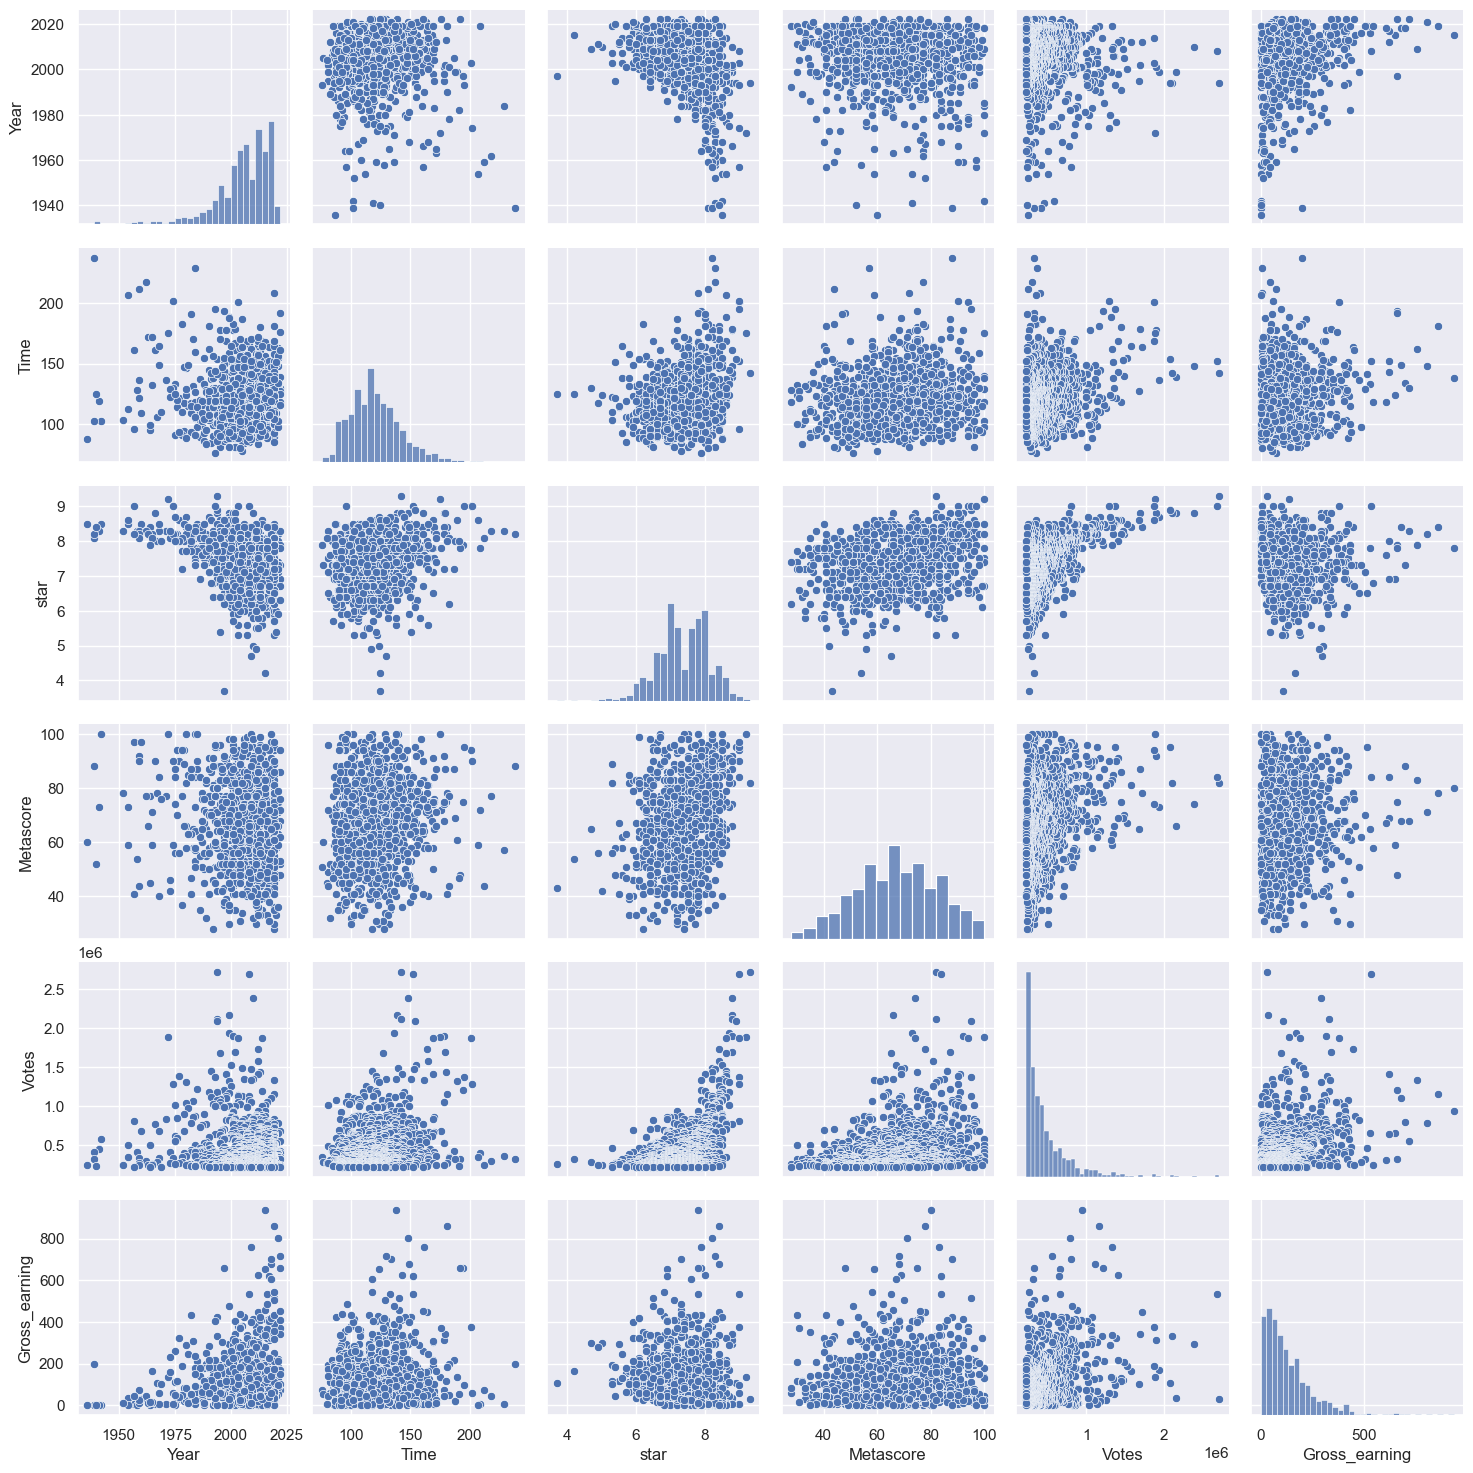

In [35]:
plt.figsize =(5,3)
sns.pairplot(data=df,hue=None, hue_order=None, palette='Set2_r', vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

<AxesSubplot:>

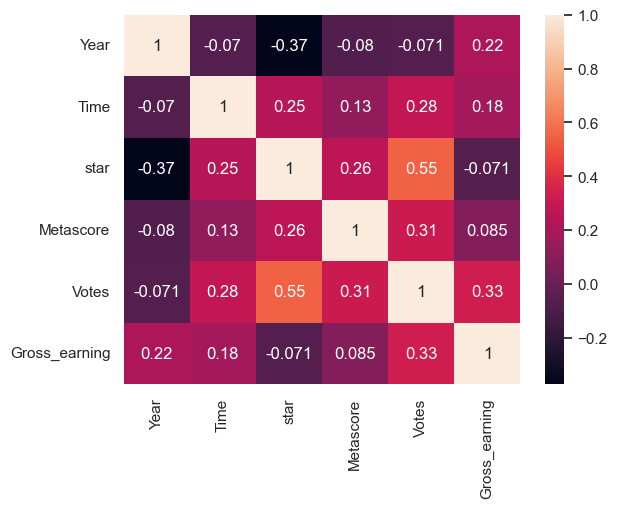

In [36]:
sns.heatmap(df.corr(),annot=True) 